## Introduction

In many biological systems, processes can occur in different compartments of the cell or be spatially separated from others.  As an example, gene transcription occurs in the nucleus, the produced mRNA is then transported to the rough endoplasmic reticulum where it is translated into proteins which are then transported to the Golgi apparatus.  There they are modified and moved on to another destination inside or outside of the cell.  Therefore it is important to understand how to model these types of systems.  

In this experiment, two forms of spatial modeling are conducted.  In the first, a multicompartmental model of complex calcium oscillations was modeled using ODEs and these ODE's were solved through time.  In this system the model was compartmentalized into the cytosol, the mitochondria and the endoplasmic reticulum.  In the model, calcium was imported and exported into and out og multiple locations through the cell and as such, oscillated through time.  These oscillates were monitored through time by plotting the concentration of calcium in each compartment with different initial conditions and parameter settings.  Also the phase plots were examined to see how the system evolved over time.

In the second part, a reaction diffusion system was modeled in 2D with differential equations and solved using the finite difference method through time.  Two reaction diffusion systems were examined, the Gierer-Meinhardt system and the Schnakenberg system.  The Gierer-Meinhardt system was modeled with unchanging boundary conditions, while the Schnakenberg system was modeled with periodic boundaries all around.  The systems were stepped through time using the finite difference method, and the resulting 2D systems of concentrations were plotted over time and the system states were observed.





## Complex calcium oscillations - A multicompartmental mode
In this section, calcium fluxes in a compartmentalized cell were modelled. Calcium can be present in the cytosol ($Ca_{cyt}$), bound to calcium binding proteins residing in the cytosol ($CaPr$), the Endoplasmic Reticulum (ER) ($Ca_{ER}$) as well as the mitochondria ($Ca_m$). Fluxes between these compartments occur, leading to a an exchange of calcium. The overall setup of the system is shown in Figure 1.
![title](Scheme.png)
Figure 1: Calcium fluxes within a cell. $Ca_{compartment}$ indicates the calcium concentration in the respective compartment, Pr are calcium binding proteins, CaPr represents these proteins in their calcium bound state.

Calcium can be present in the ER, the cytosol or the mitochondria. Calcium flux between ER and cytosol is mediated by ion pumps, leakage through the membrane of the ER as well as passive transport of ions through calcium channels. While the ion pump only imports calcium into the ER, both leakage and passive transport through channels can go in both directions, dependent on the ratio of concentrations in the two compartments.

Calcium ions are imported from the cytosol to the mitochondria via uniporters, not allowing backflow through these channels, while the export from the mitochondria into the cytosol is mediated by both a $Na^+/Ca^{2+}$-exchanger and calcium leakage into the cytosol.

Further, cytosolic calcium can bind to calcium binding proteins ($Pr$) to form $CaPr$. These complexes can dissociate returning to free cytosolic calcium and unbound proteins.

Different formulas are used to describe this system.
The total calcium concentration ($Ca_{tot}$) can be defined as:

$Ca_{tot} = Ca_{cyt} + \frac{\rho_{ER}}{\beta_{ER}} Ca_{ER}+\frac{\rho_{m}}{\beta_{m}} Ca_{m}+CaPr$

The total amount of the calcium binding protein ($Pr_{tot}$) in its bound ($CaPr$) or unbound ($Pr$) form is defined as:

$Pr_{tot} = Pr + CaPr$

To describe the rate of change of calcium concentrations in the different compartments the following formulas can be used:

$\frac{dCa_{cyt}}{dt} = J_{ch} + J_{leak} - J_{pump} + J_{out} - J_{in} + k_- CaPr - k_+ Ca_{cyt}Pr$

$\frac{dCa_{ER}}{dt} = \frac{\beta_{ER}}{\rho_{ER}}(J_{pump} - J_{ch} - J_{leak})$

$\frac{dCa_{m}}{dt} = \frac{\beta_{m}}{\rho_{m}}(J_{in} - J_{out})$

Where the fluxes ($J$) are defined as:

$J_{pump} = k_{pump}Ca_{cyt}$

$J_{ch} = k_{ch}\frac{Ca_{cyt}^2}{K_1^2+Ca_{cyt}^2}(Ca_{ER}-Ca_{cyt})$

$J_{leak} = k_{leak}(Ca_{ER} - Ca_{cyt})$

$J_{in} = k_{in}\frac{Ca_{cyt}^8}{K_2^8+Ca_{cyt}^8}$

$J_{out} = (k_{out}\frac{Ca_{cyt}^2}{K_3^2+Ca_{cyt}^2}+k_m)Ca_{m}$


$\beta_{compartment}$ represents the concentration of free calcium in the compartment relative to the total calcium concetration in the respective compartment, while $\rho_{compartment}$ is the ratio of the compartments volume compared to the cytosol.

$k_- CaPr$ represents the dissociation of calicum bound proteins into free calcium and unbound proteins. $k_+ Ca_{cyt}Pr$ is the forward reaction of calcium residing in thy cytosol and free proteins to $CaPr$.

$J_{pump}$ is the outflux from the cytosol into the ER via ion pumps. It depends on the maximal rate of the ion pump ($k_{pump}$) as well as the current concentration of cytosolic calcium. Higher calcium concentration, as well as a more active pump lead to a higher $J_{pump}$.

$J_{ch}$ defines the flux from the ER into the cystosol via calcium channels. $k_{ch}\frac{Ca_{cyt}^2}{K_1^2+Ca_{cyt}^2}$ is the maximal rate of the calcium channel ($k_{ch}$) scaled by a Hill term that takes into account the affinity of the channel for calcium ($K_1$) and the current calcium concentration in the cytosol, together with a Hill coefficient of 2. The direction of the flux, as well as the extend is further modified by the difference in $Ca_{ER}$ and $Ca_{cyt}$. Since transport through the channels is passive, it will seak to establish equilibrium, by producing a flux from the compartment with the higher concentration to the one with the lower one. A bigger gradient between the two of them lead to a stronger flux.

$J_{leak}$ describes the leakage of calcium ions through the membrane of the ER into the cytosol. It depends on the maximum rate at which ions can pass trough the membrane ($k_{leak}$) and analogically to $J_{ch}$ the gradient between $Ca_{ER}$ and $Ca_{cyt}$.

$J_{in}$ is defined as the influx of $Ca^{2+}$ ions from the cytosol to the mitochondria. It is decribed by the maximal permeability of calcium uniporters importing calcium ($k_{in}$) and a Hill term ($\frac{Ca_{cyt}^8}{K_2^8+Ca_{cyt}^8}$) that takes into account the affinity parameter $K_{2}$, as well as cytosolic calcium concentrations, and has a hill coefficient of 8.

Lastly the formula of $J_{out}$ contains $k_m$ as a term to describe leakage from the mitochondria to the cytosol, as well as $k_{out}\frac{Ca_{cyt}^2}{K_3^2+Ca_{cyt}^2}$ as the product of maximal rate of the $Na^+/Ca^{2+}$-exchangers and a Hill term with the Hill coefficient 2. The sum of these two terms is scaled by the current concentration of mitochondrial calcium.

The fact that $J_{ch}$, $J_{in}$ and $J_{out}$ contain Hill terms, indicats that the proteins playing a role in this might consist of several subunits, that display cooperativity. The Hill coefficients indicate that the ER ion channel, and the $Na^+/Ca^{2+}$-exchangers mediating mitochondrial outflux might consist of two cooperating units, while the uniporters mediating the influx of calcium into the mitochondria might consist of eight such subunits.

The aforementioned formulas were used to build a computational model of calcium flux between the different compartments of a cell. The development of the calcium concentrations over time as well as the concentrations in the compartments with respect to the other compartments are plotted in Figures 2-5.
Starting values of  $Ca_{cyt} = 0.3 \mu M, Ca_{ER} = 0.2 \mu M, Ca_m = 1 \mu M$ and the parameters in the following table were used to initialize the simulation.
![title](Parameters.png)

In [1]:
# Basic Imports
from __future__ import division
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import math
import copy
from scipy.integrate import odeint
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
import sympy.solvers.ode
from sympy import *
import copy
import random as rd

In [15]:
# Define the flux equations

def fluxPump(k_pump,Ca_cyt):
    return k_pump*Ca_cyt

def fluxCh(k_ch, Ca_cyt,Ca_ER,K1):
    return k_ch*((Ca_cyt**2)/(K1**2 + Ca_cyt**2))*(Ca_ER - Ca_cyt)

def fluxLeak(k_leak, Ca_ER, Ca_cyt):
    return k_leak*(Ca_ER - Ca_cyt)

def fluxIn(k_in, K2, Ca_cyt):
    return k_in*(Ca_cyt**8/(K2**8 + Ca_cyt**8))

def fluxOut(k_out, K3, Ca_cyt, km, Ca_m):
    return Ca_m*(k_out*(Ca_cyt**2 / (K3**2 + Ca_cyt**2))+km)

def calcCaPr(Ca_tot, Ca_cyt, Ca_ER, Ca_m, p_ER, p_m, b_ER, b_m):
    return Ca_tot - (Ca_ER*(p_ER/b_ER)) - (Ca_m*(p_m/b_m)) - Ca_cyt

def calcPr(Pr_tot, CaPr):
    return Pr_tot - CaPr

# Differential equations

def dCa_cyt(J_ch, J_leak, J_pump, J_in, J_out, k_minus, CaPr, k_plus, Ca_cyt, Pr):
    return J_ch + J_leak - J_pump + J_out - J_in + (k_minus*CaPr) - (k_plus*Ca_cyt*Pr)

def dCa_ER(beta_ER, rho_ER, J_pump, J_ch, J_leak):
    return (beta_ER/rho_ER)*(J_pump - J_ch - J_leak)

def dCa_m(beat_m, rho_m, J_in, J_out):
    return (beta_m/rho_m)*(J_in-J_out)    

# System of Ordinary Differential Equation

def ODE_Calcium_Sys(y0, t, Ca_tot, Pr_tot, p_ER, p_m, b_ER, b_m, k_ch, k_pump, k_leak, k_in, k_out, k_m, k_plus, k_minus, K1,K2,K3):
    '''This function defines the system of ODES which controls the levels of calcium in the system'''
    
    # Separate initial conditions
    Ca_cyt, Ca_ER, Ca_m = y0
    
    # calculate dependent variables
    CaPr = calcCaPr(Ca_tot, Ca_cyt, Ca_ER, Ca_m, p_ER, p_m, b_ER, b_m)
    Pr = calcPr(Pr_tot, CaPr)
    J_pump = fluxPump(k_pump, Ca_cyt)
    J_ch = fluxCh(k_ch,Ca_cyt,Ca_ER,K1)
    J_leak = fluxLeak(k_leak, Ca_ER, Ca_cyt)
    J_in = fluxIn(k_in, K2, Ca_cyt)
    J_out = fluxOut(k_out, K3, Ca_cyt, k_m, Ca_m)
    
    Ca_cyt_1 = dCa_cyt(J_ch, J_leak, J_pump, J_in, J_out, k_minus, CaPr, k_plus, Ca_cyt, Pr)
    Ca_ER_1 = dCa_ER(beta_ER, rho_ER, J_pump, J_ch, J_leak)
    Ca_m_1 = dCa_m(beta_m, rho_m, J_in, J_out)
    
    return Ca_cyt_1, Ca_ER_1, Ca_m_1

In [16]:
# Declare parameters
#---------------------------------------
#Total concentrations (micro Moles)
Ca_tot =  90 
Pr_tot = 120

# Geometric Parameters

rho_ER = 0.01
rho_m = 0.01
beta_ER = 0.0025
beta_m = 0.0025

#Kinetics parameters

k_ch = 4100 #s^-1
k_pump = 20 #s^-1
k_leak = 0.05 #s^-1
k_in = 300 #(micro Moles s^-1)
k_out = 125 #s^-1
k_m = 0.00625 #s^-1
k_plus = 0.1 #(micro Moles)
k_minus = 0.01 #s^-1
K1 = 5 #(micro Moles)
K2 = 0.8 #(micro Moles)
K3 = 5 #(micro Moles)

#Initial concentrations (micro Moles)

Ca_cyt_0 = 0.3 
Ca_ER_0 = 0.2
Ca_m_0 = 1

#Run the system

time_steps = np.arange(0,300,0.01)

start = int(100/0.01)
end = int(300/0.01)

calcium_over_time = odeint(ODE_Calcium_Sys, (Ca_cyt_0,Ca_ER_0,Ca_m_0), time_steps, args = (Ca_tot, Pr_tot, rho_ER, rho_m, beta_ER, beta_m, k_ch, k_pump, k_leak, k_in, k_out, k_m, k_plus, k_minus, K1,K2,K3))
calcium_over_time = calcium_over_time.T

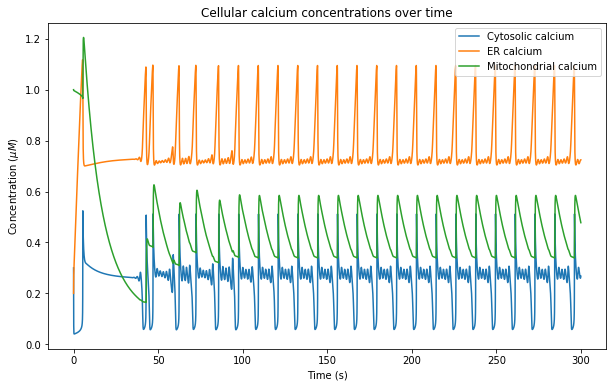

In [17]:
%matplotlib inline
plt.figure(2,figsize = (10,6))
plt.title("Cellular calcium concentrations over time")
plt.xlabel('Time (s)')
plt.ylabel('Concentration ($\mu M$)')
plt_labels = ['Cytosolic calcium', 'ER calcium', 'Mitochondrial calcium']
for i in range(0,len(calcium_over_time)):
    plt.plot(time_steps, calcium_over_time[i], label = plt_labels[i])
plt.legend()
plt.show()

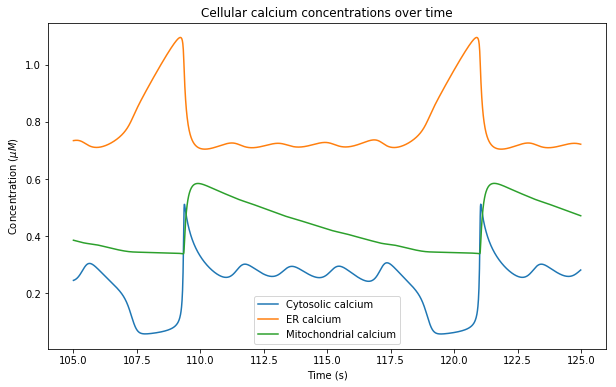

In [18]:
%matplotlib inline
zoom_start = int(105/0.01)
zoom_end = int(125/0.01)
plt.figure(3,figsize = (10,6))
plt.title("Cellular calcium concentrations over time")
plt.xlabel('Time (s)')
plt.ylabel('Concentration ($\mu M$)')
plt_labels = ['Cytosolic calcium', 'ER calcium', 'Mitochondrial calcium']
for i in range(0,len(calcium_over_time)):
    plt.plot(time_steps[zoom_start:zoom_end], calcium_over_time[i][zoom_start:zoom_end], label = plt_labels[i])
plt.legend()
plt.show()

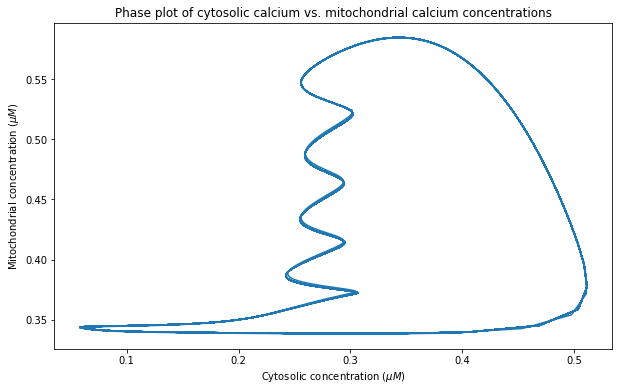

In [19]:
%matplotlib inline
plt.figure(4,figsize = (10,6))
plt.title("Phase plot of cytosolic calcium vs. mitochondrial calcium concentrations")
plt.xlabel('Cytosolic concentration ($\mu M$)')
plt.ylabel('Mitochondrial concentration ($\mu M$)')
plt.plot(calcium_over_time[0][start:end], calcium_over_time[2][start:end])
plt.show()

<IPython.core.display.Javascript object>


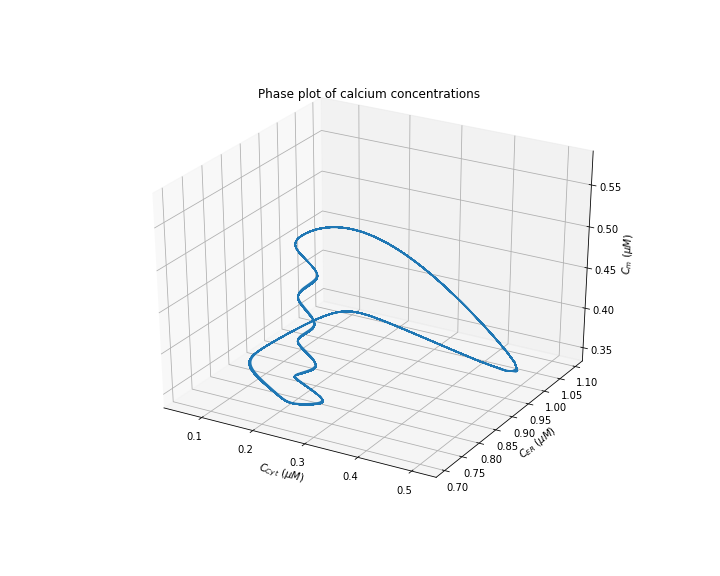

Text(0.5,0.92,'Phase plot of calcium concentrations')

In [26]:
%matplotlib notebook
fig = plt.figure(5,figsize = (10,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('$C_{Cyt}$ ($\mu M$)')
ax.set_ylabel('$C_{ER}$ ($\mu M$)')
ax.set_zlabel('$C_m$ ($\mu M$)')
ax.plot3D(calcium_over_time[0][start:end], calcium_over_time[1][start:end], calcium_over_time[2][start:end])
plt.title('Phase plot of calcium concentrations')


The most promoinent feature of the simulation is the oscillatory behavior of the caclcum concentrations in the different compartments. $Ca_{cyt}$, $Ca_{ER}$ and $Ca_m$ all display repeated and periodic sharp rises and sharp falls. These go in concert, where the rise of calcium concentrations in one compartment comes along with the fall of concentration in another.

Initially $Ca_{ER}$ shows a sharp rise to a value to approximately 1.1 $\mu M$, while $Ca_m$ shows a slight drop, and $Ca_{cyt}$ approaches zero. After a few seconds, $Ca_m$ shows a sharp rise to 1.2 $\mu M$ and a subsequent drop to around 0.2 $\mu M$. In the same time interval $Ca_{ER}$ drops to approximately 0.7 $\mu M$, and stays at this concentration for a few seconds. Lastly $Ca_{cyt}$ displays a rise to 0.5 $\mu M$ and a subsequent drop to approximately 0.3 $\mu M$.

From this moment on oscillations occur. For $Ca_{ER}$ and $Ca_{cyt}$ these consist of sharp rises and falls, interrupted by small oscillations around 0.7 $\mu M$ and 0.3 $\mu M$, resepectively. While the patterns in which the calcium concentrations change is repeating approximately every 10 - 15 seconds, these periodicly occuring trends, are not completely identical. When observed closely, slight differences in peak heights can be observed.

The phase plot of $Ca_{cyt}$ and $Ca_m$ clearly shows the repeated, oscillatory patterns. The systems visits the same paths repeatedly, with only slight deviations, indicating that these oscillations are a stable pattern.

The same holds true for the 3D phase plot $Ca_{cyt}$, $Ca_{ER}$ and $Ca_m$. Similar paths are repeatedly visited, indicating a stable pattern.

In nature, such a stable pattern might be used for calcium signaling. In the presence of a stessor, e.g. draught, radiation or heat, the cell might beginn to induce this pattern to signal to neighboring cell about the stressor. These might react accordingly, by forwarding the signal and potentially modifying there gene regulation to respind to the stressor. This stable pattern that emerged in the simulation above, is only one of many, that could code for a specific stressor and therby bring about a specific response.

To show the influence of the calcium channel permiability on the system simulations were run, that at the same parameters as before, but with $k_{ch} = 4000 s^{-1}$ and $k_{ch} = 2950 s^{-1}$. The corresponding plots are shown in Figures 6-8 and 9-11, respecitvely.

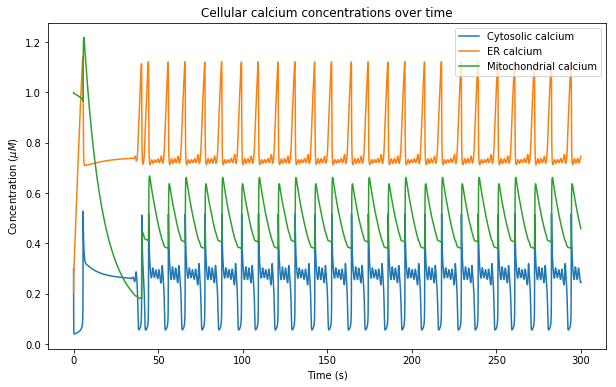

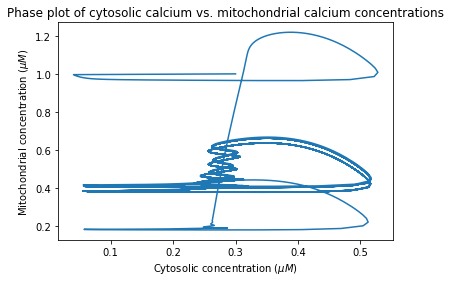

In [32]:

k_ch = 4000
start = int(0/0.01)
end = int(300/0.01)

calcium_over_time = odeint(ODE_Calcium_Sys, (Ca_cyt_0,Ca_ER_0,Ca_m_0), time_steps, args = (Ca_tot, Pr_tot, rho_ER, rho_m, beta_ER, beta_m, k_ch, k_pump, k_leak, k_in, k_out, k_m, k_plus, k_minus, K1,K2,K3))
calcium_over_time = calcium_over_time.T
%matplotlib inline
plt.figure(6,figsize = (10,6))
plt.title("Cellular calcium concentrations over time")
plt.xlabel('Time (s)')
plt.ylabel('Concentration ($\mu M$)')
plt_labels = ['Cytosolic calcium', 'ER calcium', 'Mitochondrial calcium']
for i in range(0,len(calcium_over_time)):
    plt.plot(time_steps, calcium_over_time[i], label = plt_labels[i])
plt.legend()
plt.show()

plt.figure(7)
plt.title("Phase plot of cytosolic calcium vs. mitochondrial calcium concentrations")
plt.xlabel('Cytosolic concentration ($\mu M$)')
plt.ylabel('Mitochondrial concentration ($\mu M$)')
plt.plot(calcium_over_time[0][start:end], calcium_over_time[2][start:end])
plt.show()

<IPython.core.display.Javascript object>


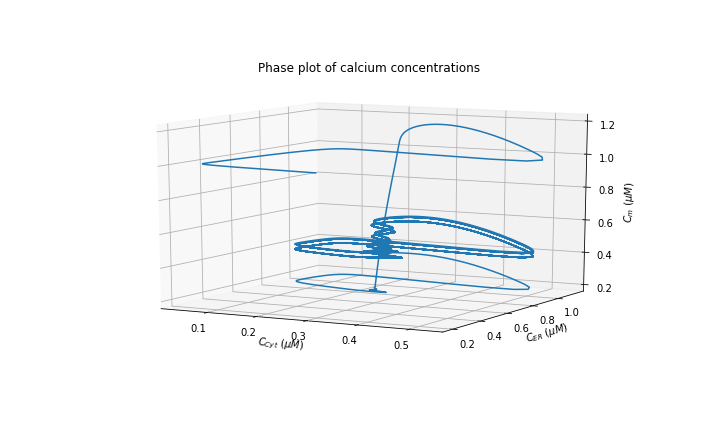

In [33]:
%matplotlib notebook
fig = plt.figure(8,figsize = (10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('$C_{Cyt}$ ($\mu M$)')
ax.set_ylabel('$C_{ER}$ ($\mu M$)')
ax.set_zlabel('$C_m$ ($\mu M$)')
ax.plot3D(calcium_over_time[0][start:end], calcium_over_time[1][start:end], calcium_over_time[2][start:end])
plt.title('Phase plot of calcium concentrations')
plt.show()

Changing $k_{ch}$ to $4000 s^{-1}$, appears to only have a minor influence on the simulation. As before, oscillations of the concentration occur in the different compartments, and these follow a relatively regular pattern. However, the peaks in  $Ca_m$ show an alternating pattern of slightly increased and slightly decreased maximal height. This can also be observed in the 2D and 3D phase plots. Whereas for $k_{ch} = 4100 s^{-1}$ there appeared to be only one paths with slight deviations, here two, slightly in $Ca_{m}$ direction offeset paths seem to be visited at equal frequency. As before slight deviations from these paths occur. Additionally the complete paths from t = 0 is plotted, meaning that systems transient to the oscillatory pattern is also captured in the figures.

Although only one parameter was changed slightly, a different pattern emerged. This alternating pattern might be used to encode a different signal to be send to neighboring cells. In response to a different stressor, the cell might modify the calcium channels, e.g. by posttranslational modification or action of an inhibitor, to effect a differnt pattern and therefore a different response.

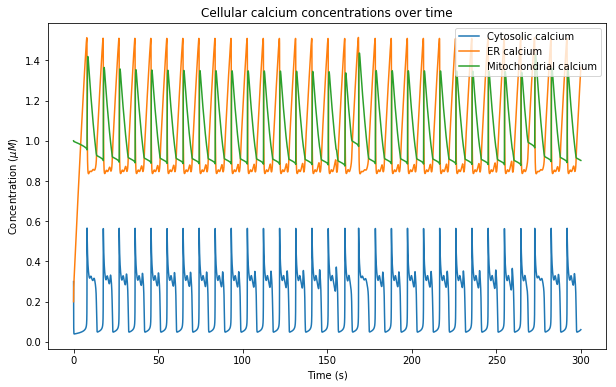

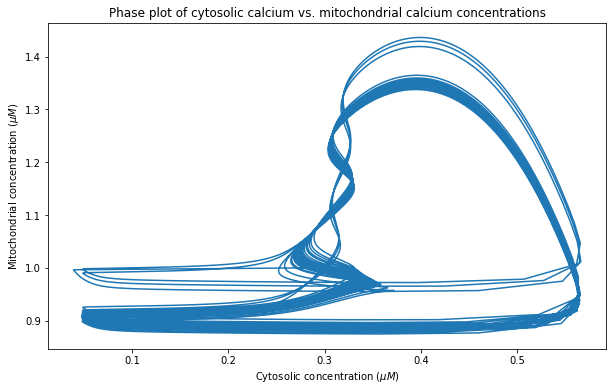

In [34]:

k_ch = 2950
start = int(0/0.01)
end = int(300/0.01)

calcium_over_time = odeint(ODE_Calcium_Sys, (Ca_cyt_0,Ca_ER_0,Ca_m_0), time_steps, args = (Ca_tot, Pr_tot, rho_ER, rho_m, beta_ER, beta_m, k_ch, k_pump, k_leak, k_in, k_out, k_m, k_plus, k_minus, K1,K2,K3))
calcium_over_time = calcium_over_time.T

%matplotlib inline
plt.figure(9,figsize = (10,6))
plt.title("Cellular calcium concentrations over time")
plt.xlabel('Time (s)')
plt.ylabel('Concentration ($\mu M$)')
plt_labels = ['Cytosolic calcium', 'ER calcium', 'Mitochondrial calcium']
for i in range(0,len(calcium_over_time)):
    plt.plot(time_steps, calcium_over_time[i], label = plt_labels[i])
plt.legend()
plt.show()

plt.figure(10,figsize = (10,6))
plt.title("Phase plot of cytosolic calcium vs. mitochondrial calcium concentrations")
plt.xlabel('Cytosolic concentration ($\mu M$)')
plt.ylabel('Mitochondrial concentration ($\mu M$)')
plt.plot(calcium_over_time[0][start:end], calcium_over_time[2][start:end])
plt.show()


<IPython.core.display.Javascript object>


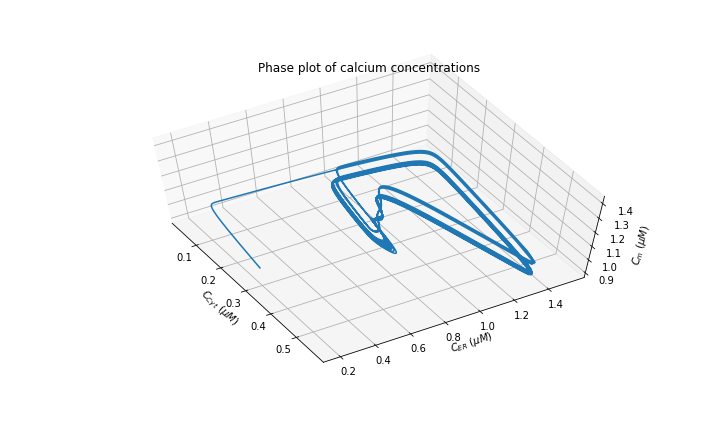

In [35]:
%matplotlib notebook
fig = plt.figure(11,figsize = (10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('$C_{Cyt}$ ($\mu M$)')
ax.set_ylabel('$C_{ER}$ ($\mu M$)')
ax.set_zlabel('$C_m$ ($\mu M$)')
ax.plot3D(calcium_over_time[0][start:end], calcium_over_time[1][start:end], calcium_over_time[2][start:end])
plt.title('Phase plot of calcium concentrations')
plt.show()

When lowering the channel permeability even more, a more clearly distinct pattern emerges. While concentrations in all compartments still fluctuate, the $Ca_{m}$ is constantly higher than in the previous experiments. Additionaly the rise and fall of $Ca_{ER}$ is less sharp, giving these peaks a more triangular shape. As before, not all perios show the exact same pattern. In this simulations, some spikes of $Ca_{m}$ are elevated, while the small ocsillations following a peak in $Ca_{cyt}$ are drawn out in some of the periods. This leads to a shift in the phase plot, where a fraction of the cases one path is followed, while in a smaller fraction a shifted path occurs. The most important change in the system's behavior however, is the substantiall higher pace at which the repetition of peaks occur. While previously 26 spikes of $Ca_{cyt}$ were observed over 300 seconds, at $k_{ch} = 2950 s^{-1}$ 31 of these peaks occur. 

This again would encode a different calcium signal, to which neighboring cell, receiving the signal could respond differently. Thes three examples show already, that slight modifications of the system can lead to completely different patterns, allowing for a wide variety of signals being send as a response to different inputs.

Considering that the calcium channel has been proven to be of high importance for the systems behavor it was investigated how the system would behave in case of a genetic mutation that would prevent the transscription and translation of the gene encoding the calcium channels, or would lead to misfolded and therefore inactive channels.
The $Ca^{2+}$ channels allow a passive transport of calcium ions through the membrane of the ER. As long as the channels are functional and open, ions will flow from the higher to the lower concentration. Initially the $k_{ch}$ was set to 4100 $s^{-1}$, meaning that high numbers of ions could pass trough the channel if the gradient between ER and cystol is high. If the channels would be inactivated, no channel mediated flow would be possible anymore. Therefore $J_{ch}$ would be set to 0 causing the formulas of to change respectively. This yielded:
$\frac{dCa_{cyt}}{dt} = J_{leak} - J_{pump} + J_{out} - J_{in} + k_- CaPr - k_+ Ca_{cyt}Pr$

$\frac{dCa_{ER}}{dt} = \frac{\beta_{ER}}{\rho_{ER}}(J_{pump} - J_{leak})$

$\frac{dCa_{m}}{dt} = \frac{\beta_{m}}{\rho_{m}}(J_{in} - J_{out})$

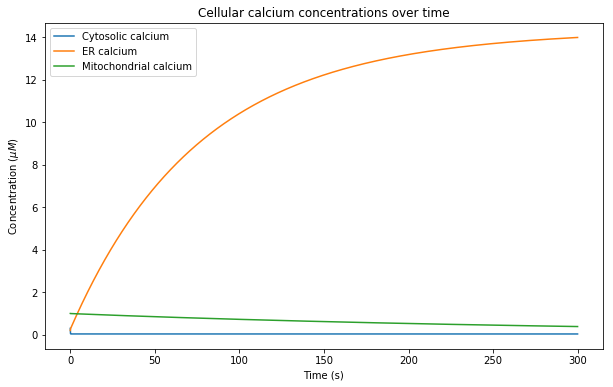

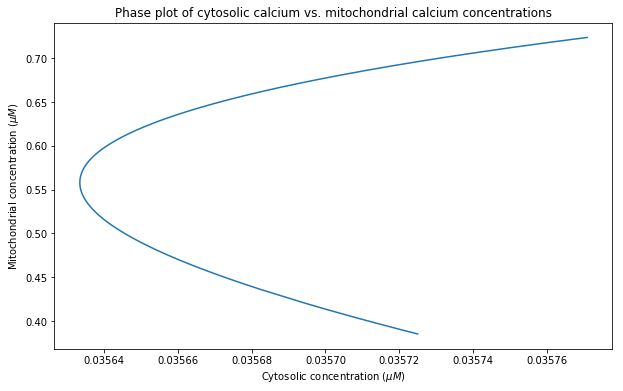

In [36]:
k_ch = 0
start = int(100/0.01)
end = int(300/0.01)

calcium_over_time = odeint(ODE_Calcium_Sys, (Ca_cyt_0,Ca_ER_0,Ca_m_0), time_steps, args = (Ca_tot, Pr_tot, rho_ER, rho_m, beta_ER, beta_m, k_ch, k_pump, k_leak, k_in, k_out, k_m, k_plus, k_minus, K1,K2,K3))
calcium_over_time = calcium_over_time.T

%matplotlib inline
plt.figure(12,figsize = (10,6))
plt.title("Cellular calcium concentrations over time")
plt.xlabel('Time (s)')
plt.ylabel('Concentration ($\mu M$)')
plt_labels = ['Cytosolic calcium', 'ER calcium', 'Mitochondrial calcium']
for i in range(0,len(calcium_over_time)):
    plt.plot(time_steps, calcium_over_time[i], label = plt_labels[i])
plt.legend()
plt.show()

plt.figure(13,figsize = (10,6))
plt.title("Phase plot of cytosolic calcium vs. mitochondrial calcium concentrations")
plt.xlabel('Cytosolic concentration ($\mu M$)')
plt.ylabel('Mitochondrial concentration ($\mu M$)')
plt.plot(calcium_over_time[0][start:end], calcium_over_time[2][start:end])
plt.show()



<IPython.core.display.Javascript object>


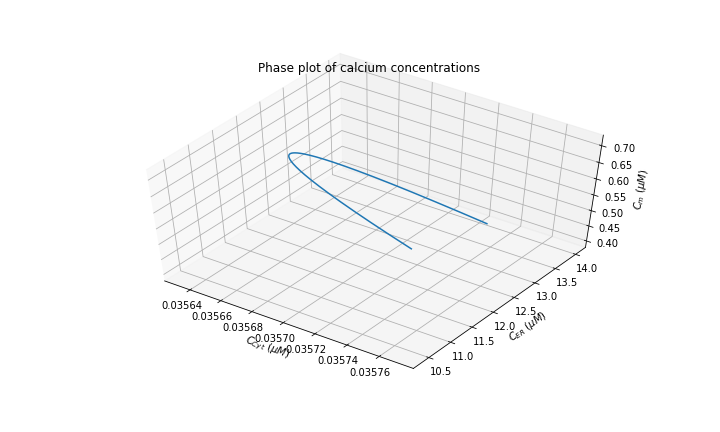

In [37]:
%matplotlib notebook
fig = plt.figure(14,figsize = (10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('$C_{Cyt}$ ($\mu M$)')
ax.set_ylabel('$C_{ER}$ ($\mu M$)')
ax.set_zlabel('$C_m$ ($\mu M$)')
ax.plot3D(calcium_over_time[0][start:end], calcium_over_time[1][start:end], calcium_over_time[2][start:end])
plt.title('Phase plot of calcium concentrations')
plt.show()

In [29]:
%matplotlib inline

The inactivation of calcium channels, lead to completely different dynamics occuring within the cell. While the calcium concentrations in the different compartments oscillated in cells with functional calcium channels, no such oscillations was observed in the cells without the channels. 

Since in this case outflux from the ER is only mediated by leakage ($J_{leak}$), and $k_{leak}$ is approximately five orders of magnitude smaller than $k_{ch}$ (0.05 $s^{-1}$ compared to 4100 $s^{-1}$) outflux dramatically dropped. Since the ion pump mediated influx is untouched, calcium builds up in the ER in a logarithmic manner, approaching 15 $\mu M$ of calcium. 

Cytosolic concentrations of calcium dropped to a value close to zero in the beginning and stay low for the complete simulation. This makes sense, since they are continuously being depleted by the ER with only a small fraction of calcium from the ER returning to the cytosol through leakage.

The mitochondrial concentration continuously drop over the course of the simulation, slowly approaching zero. Since $Ca_{in}$ is low $J_{in}$ is also low. $J_{out}$, on the other hand, is driven by $Ca_{m}$ and therefore higher. This leads to an approximately constant outflow from the mitochondria.

Considering that 90 $\mu M$ are initially present, and approximately 15 $\mu M$ are present in cytosol, ER and mitochondria at the end of the simulation, the remaining calcium should be bound to proteins. This is not surprising, when taking into account that $k_+$ is one order of magnitude larger than $k_-$ (0.1 $\mu M s^{-1}$ compared to 0.01 $\mu M s^{-1}$), meaning that a substantial part of the calcium will be bound to proteins, if a sufficiently large amount of them is present.

In a cell such a mutation would probably be fatal, since no calcium signalling could occur anymore, leaving the organism unable to react to enviromental stressors or intracellular changes that demand adaptation.

## 2 Introduction to Pattern Formation

In this part of the experiment, pattern formation in biological systems was analyzed by simulating the systems with a set of reaction diffusion equations and by solving them using the finite difference method.  In this experiment two different systems were analyzed, the Gierer-Meinhardt system and the Schnakenberg system.  The Gierer-Meinhardt and the Schnakenberg systems are activator inhibitor systems that appears to account for many important types of patter formation morphogenesis observed during development.  It has been shown to explain the formation of organizing regions and pattern formation.

A reaction diffusion system take the form of:

$\frac{\partial u}{\partial t}=D_{u} \nabla^{2} u+f(u)$

where $u$ is the concentration of substance u, $D_u$ is the diffusion constant which controls the rate of diffusion, and $f(u)$ is the reaction equation created by using the law of mass actions.

For the systems in this experiment, there are two different substances, u and v, the activator and inhibitor, respectively.  In the Gierer-Meinhardt system the reaction equation for the two substances are defined as:

$f_u(u, v)=c_{1}-c_{2} u+c_{3} \frac{u^{2}}{\left(1+k u^{2}\right) v}$

$f_v(u, v)=c_{4} u^{2}-c_{5} v$

where $u$ is the concentration of the activator, $v$ is the concentration of the inhibitor, $c_{1}$ is the rate of production of u, $c_{2}$ is the rate of decay of u, $c_{3}$ is the rate that production of u is stimulated by u and v, $c_{4}$ is the rate of production of v, and $c_{5}$ is the rate of decay of v. The parameter k is a constant to take into consideration the regulation of the system.  

The Gierer-Meinhardt system was defined to exist in a 1x1 box grid with step sizes of 0.02 in both the x and y direction. Initial concentrations v and u would be a random start distribution between 0.999 and 1.001 for u and between 1.999 and 2.001 for v.  For the system, boundary conditions were set such that the rate of change around the boundary is 0, i.e $u_{x}(0,y, t)=u_{x}(1,y, t)=v_{x}(0, y, t)=v_{x}(1,y, t)=u_{y}(x,0, t)=u_{y}(x,1, t)=v_{y}(x, 0, t)=v_{y}(x,1, t)=0$.

In the Schnakenberg system the reaction equation for the two substances are defined as:

$f_u(u, v)=c_{1}-c_{-1} u+c_{3} u^{2} v$

$f_v(u, v)=c_{2}-c_{3} u^{2} v$

where $u$ is the concentration of the activator, $v$ is the concentration of the inhibitor, $c_{1}$ is the rate of production of u, $c_{-1}$ is the rate of decay of u, $c_{3}$ is the rate that production of u is stimulated by u and inhibited v, $c_{2}$ is the rate of production of v, and $c_{3}$ is the rate of decay of v.

The Schnakenberg system was defined to exist in a 1x1 box grid with step sizes of 0.02 in both the x and y direction. Initial concentrations v and u would be a random start distribution between 0.999 and 1.001 for u and between 2.999 and 3.001 for v.  For the system, periodic boundary conditions were set such that, $u(0,y,t)=u(1,y,t)$, $u(x,0,t)=u(x,1,t)$, $v(0,y,t)=v(1,y,t)$, $v(x,0,t)=v(x,1,t)$.

After the reaction diffusion equations and the boundary conditions had been defined, the Gierer-Meinhardt was solved using the finite difference method to determine what happens to a system over time.  To initialize the system, it was taken that the concentrations of v and u would be a random start distribution between 0.999 and 1.001 for u and between 1.999 and 2.001 for v.  The constants were defined as $D_u = 0.0004$, $D_v = 0.04$, $c_1 = 1$, $c_2 = 1$, $c_3 = 2$, $c_4 = 2$, $c_5 = 0$, $k = 1$, $dt = 0.001$ and $dx = 0.02$.  With these values the system was run for 10 time intervals.  The resulting graphs for u and v over time can be seen below.

In [2]:
def laplacian(Z):
    dx = 2/100
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

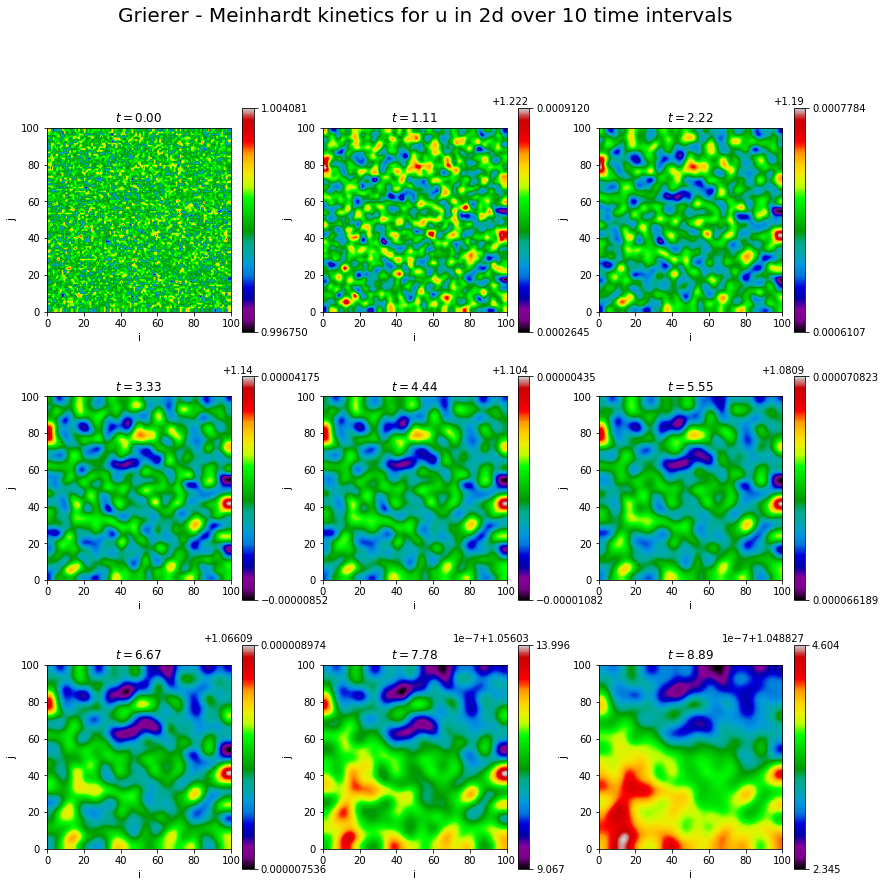

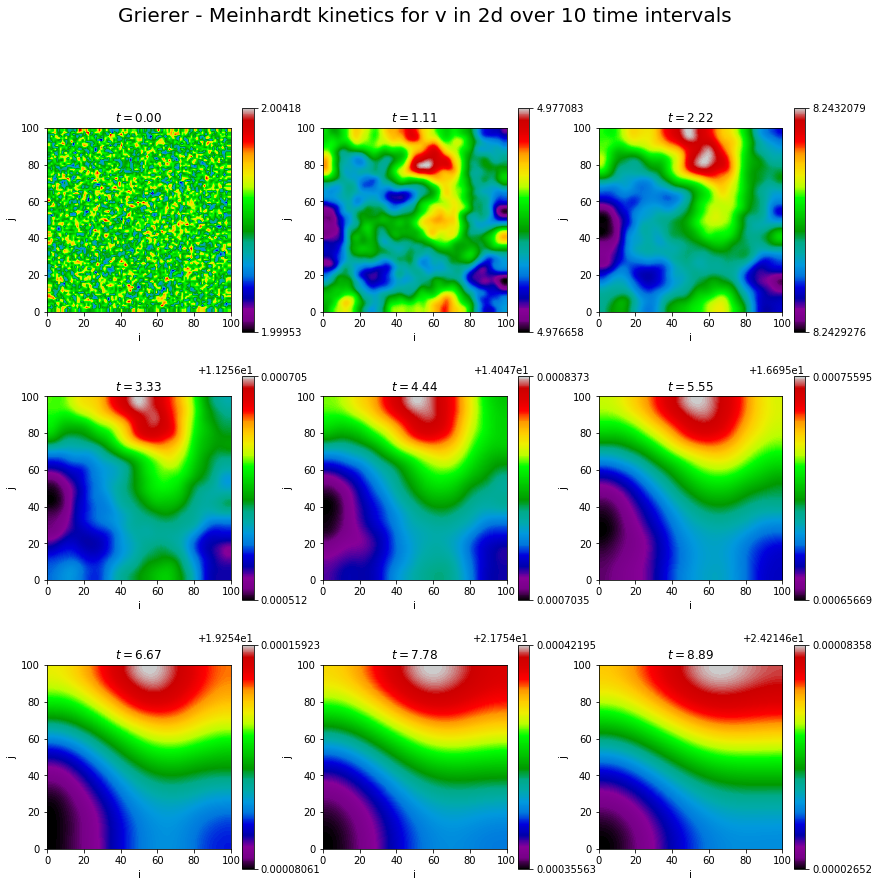

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
size = 100

U = np.random.normal(1., 0.001, size=(size,size))
V = np.random.normal(2., 0.001, size=(size,size))
count = 1

t = 10
dt = 1./1000

n = int(t/dt)

Du = 0.0004 
Dv = 0.04
c1 = 1. 
c2 = 1. 
c3 = 2. 
c4 = 2. 
c5 = 0. 
k = 1.

v_time = []

fig = plt.figure(1,figsize=(14, 14))
fig.suptitle("Gierer - Meinhardt kinetics for u in 2D over "+str(t)+" time intervals", size = 20)
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1].copy()
    Vc = V[1:-1, 1:-1].copy()
    f_u = c1 - c2*Uc + (c3*(Uc**2)/((1+k*Uc**2)*Vc))
    f_v = c4*Uc**2 - c5*Vc
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (Du*deltaU + f_u),\
        Vc + dt * (Dv*deltaV + f_v) 
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
    v_time.append(V.copy())
    if i % step_plot == 0 and i < 9 * step_plot:
        #print(i)
        a = fig.add_subplot(3,3,count)
        count +=1
        #ax = axes.flat[i // step_plot]
        plt.imshow(U, cmap=plt.cm.nipy_spectral,
              interpolation='bilinear',
              extent=[0, 100, 0, 100])
        #ax.set_axis_off()
        a.set_title(f'$t={i * dt:.2f}$')
        plt.xlabel("i")
        plt.ylabel("j")
        cbar = plt.colorbar(ticks=[np.min(U), np.max(U)])
        
plt.show()

fig = plt.figure(1,figsize=(14, 14))
fig.suptitle("Gierer - Meinhardt kinetics for v in 2D over "+str(t)+" time intervals", size = 20)

i = 0
count = 1

for i in range(n):
    if i % step_plot == 0 and i < 9 * step_plot:
        #print(i)
        a = fig.add_subplot(3,3,count)
        count +=1
        #ax = axes.flat[i // step_plot]
        plt.imshow(v_time[i], cmap=plt.cm.nipy_spectral,
              interpolation='bilinear',
              extent=[0, 100, 0, 100])
        #ax.set_axis_off()
        a.set_title(f'$t={i * dt:.2f}$')
        plt.xlabel("i")
        plt.ylabel("j")
        cbar = plt.colorbar(ticks=[np.min(v_time[i]), np.max(v_time[i])])
        
plt.show()

# diff = v_time[-2] - v_time[-1]

# plt.imshow(diff, cmap=plt.cm.nipy_spectral,
#               interpolation='bilinear',
#               extent=[0, 100, 0, 100])

In this system, the diffusion part of the equation causes the system to aim for an equilibrium over time, but the reaction part of the equation changes the concentrations at each time step.  The figures above show the concentration of u(the activator) and v(the inhibitor) over time, it can be seen that as the concentration of u increases in an area, it starts to amplify itself, further increasing the production.  If the area has a high concentration of u and v, more v is produced and the concentration of u decreases while the concentration of v begins to increase.  If the concentrations are in the right ratio, then they will both increase without the other inhibiting the production.  Since $c_5$ is 0 in this case, v will never decay. When the concentration of v is small,  more u is produced as a result, but this is only the case when $0\leq v \leq 1$, which does not occur in this system as v is initialized around 2.  It can be seen that there appears to be an uneven front of high concentration of u spreading through the system from an area of raised concentration of u where the ratio of v to u was right for the spread.  The same can be seen in the production of v where it starts in an area of high concentration of u and increases production as the concentration of u increases through the system.  As would be expected, where there are lower concentrations of u, there are higher concentrations of v.  As can be seen the concentrations of v becomes almost equal through the system as time increases, probably due to the lack of decay and driven by diffusion.  Since these systems are randomly initilized, the resulting end conditions change at each run.
While the pattern of u seems more erratic due to the randomized initialization, it is still visbile that clear patterns emerge for both u and v. If initial u concentrations were for example centralized, it is possible that more regular or predictable patterns would emerge that might find application in biology. Even thoush the initial consentrations at different positions were randomized, for v still a pattern reminiscent of seashells emerged.

In the next part of this experiment the Schnakenberg model was solved using the finite difference method to determine what happens to a system over time.  To initial the system it was taken that the concentrations of v and u would be a random start distribution between 0.999 and 1.001 for u and between 2.999 and 3.001 for v.  The constants were defined as $D_u = 0.0004$, $D_v = 0.016$, $c_1 = 0.1$, $c_{-1} = 1$, $c_2 = 0.9$, $c_3 = 1$, $dt = 0.001$ and $dx = 0.02$.  With these values the system was run for 35 time intervals.  The resulting graphs for u and v over time can be seen below.

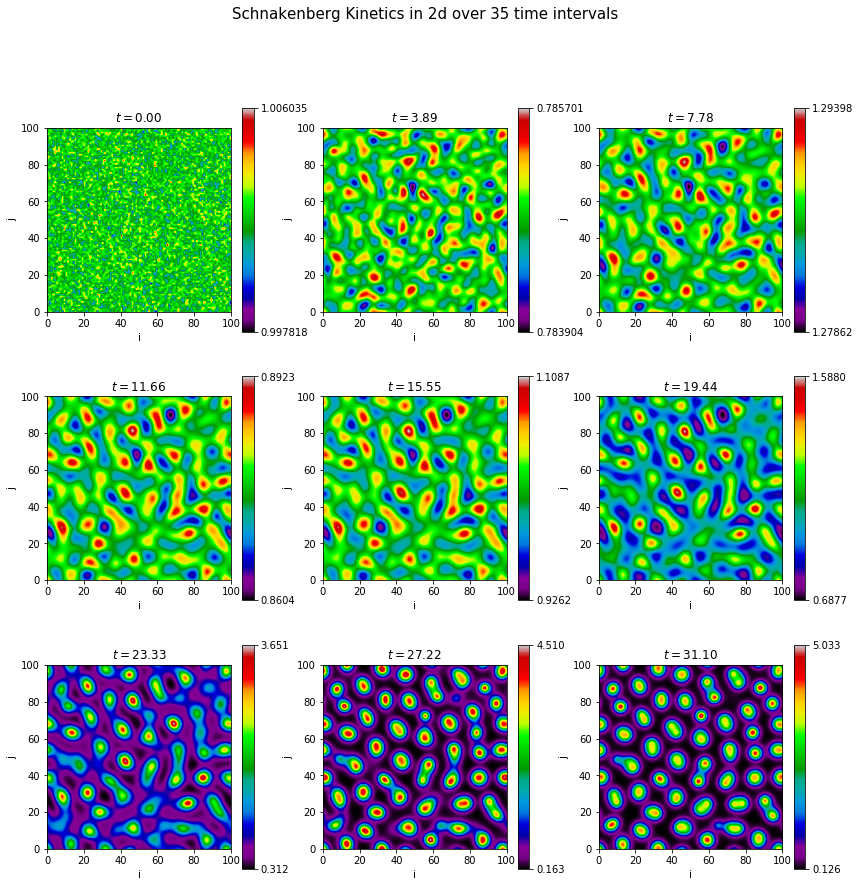

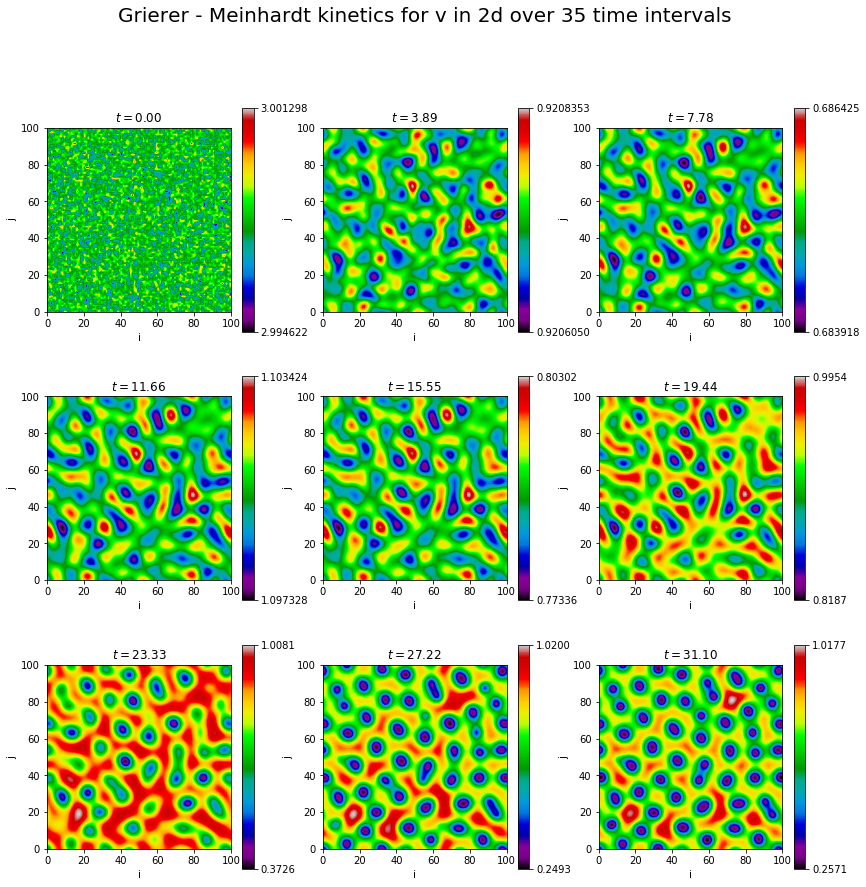

In [4]:
size = 100

U = np.random.normal(1., 0.001, size=(size,size))
V = np.random.normal(3., 0.001, size=(size,size))
count = 1
v_time = []

t = 35
dt = 1/1000

n = int(t/dt)

Du = 0.0004
Dv = 0.016
c1 = 0.1
c1min = 1
c2 = 0.9
c3 = 1

fig = plt.figure(1,figsize=(14, 14))
fig.suptitle("Schnakenberg Kinetics in 2D over "+str(t)+" time intervals", size = 15)
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    f_u = c1 - c1min*Uc + (c3*Uc**2)*Vc
    f_v = c2 -(c3*Uc**2)*Vc
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (Du*deltaU + f_u),\
        Vc + dt * (Dv*deltaV + f_v) 
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[-2, :]
        Z[-1, :] = Z[1, :]
        Z[:, 0] = Z[:, -2]
        Z[:, -1] = Z[:, 1]

    # We plot the state of the system at
    # 9 different times.
    v_time.append(V.copy())
    if i % step_plot == 0 and i < 9 * step_plot:
        #print(i)
        a = fig.add_subplot(3,3,count)
        count +=1
        #ax = axes.flat[i // step_plot]
        plt.imshow(U, cmap=plt.cm.nipy_spectral,
              interpolation='bilinear',
              extent=[0, 100, 0, 100])
        plt.xlabel("i")
        plt.ylabel("j")
        #ax.set_axis_off()
        a.set_title(f'$t={i * dt:.2f}$')
        cbar = plt.colorbar(ticks=[np.min(U), np.max(U)], shrink = True)
plt.show()
fig = plt.figure(2,figsize=(14, 14))
fig.suptitle("Schnakenberg Kinetics in 2D over "+str(t)+" time intervals", size = 15)

i = 0
count = 1

for i in range(n):
    if i % step_plot == 0 and i < 9 * step_plot:
        #print(i)
        a = fig.add_subplot(3,3,count)
        count +=1
        #ax = axes.flat[i // step_plot]
        plt.imshow(v_time[i], cmap=plt.cm.nipy_spectral,
              interpolation='bilinear',
              extent=[0, 100, 0, 100])
        #ax.set_axis_off()
        a.set_title(f'$t={i * dt:.2f}$')
        plt.xlabel("i")
        plt.ylabel("j")
        cbar = plt.colorbar(ticks=[np.min(v_time[i]), np.max(v_time[i])])
        
plt.show()

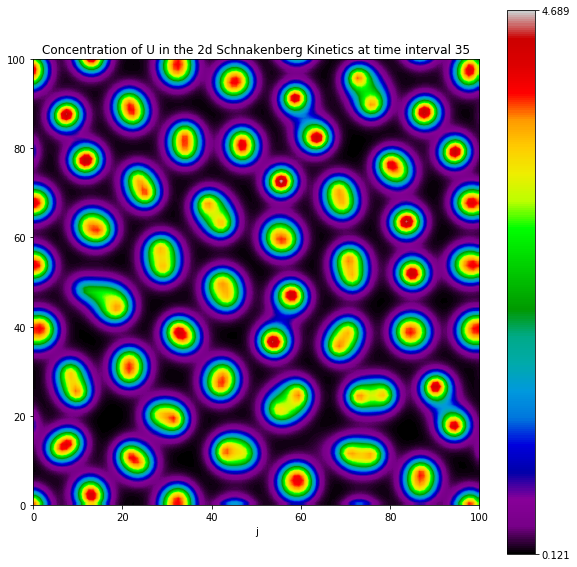

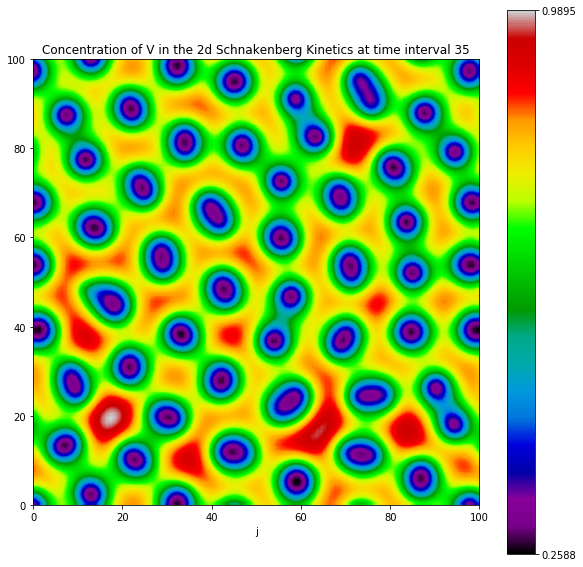

In [5]:
plt.figure(3, figsize=(10,10))
plt.title("Concentration of U in the 2D Schnakenberg Kinetics at time interval 35")
plt.xlabel('i')
plt.xlabel('j')

plt.imshow(U, cmap=plt.cm.nipy_spectral,
              interpolation='bilinear',
              extent=[0, 100, 0, 100])
plt.colorbar(ticks=[np.min(U), np.max(U)], shrink = True)
plt.show()

plt.figure(4, figsize=(10,10))
plt.title("Concentration of V in the 2D Schnakenberg Kinetics at time interval 35")
plt.xlabel('i')
plt.xlabel('j')

plt.imshow(V, cmap=plt.cm.nipy_spectral,
              interpolation='bilinear',
              extent=[0, 100, 0, 100])
plt.colorbar(ticks=[np.min(V), np.max(V)], shrink = True)
plt.show()

In this reaction diffusion system, a source of u (activator) and v (inhibitor) is present, producing at a constant rate.  The concentration of u decreases as the amount of u present increases, but this is countered by the 2nd order u increase of u when v is present in the system, but v also decays at the same rate as u increases.  This leads to some interesting dynamics which can be observed above.  At the start, higher concentration areas of u begin to form, and in response, the concentration of v decreases, but in the lower concentration areas of u, v begins to produce faster than it decays or is reacting.  As this occurs isolated pockets of u begin to appear.  Over time, the system seems to be approaching steady state, with higher concentrations of u surrounded by higher concentrations of v in a "bubble" like pattern.  The final state of the system is shown directly above.  It appears to be the steady state of the system.

Considering that the predicatbly returns a bubble pattern that alternates between each run due to to random initialization, it seems likely that nature might have adopted a similar system. The pattern seen above show some resemblance to the patterns a leopards fur is displaying. Gene expression directed during this animals early development might be directed by factors similar to the Schnakenberg kinetics, giving rise to differently colored parts of its fur.